# Description
You have just collected (with their permission) data of people's faces when interacting with your amazing software program. Your supervisor asks, "how did they like it?" and so you decide to analyze the image captures to find out what expressions are they making.

In this assignment, you will cluster and analyze static image-based data. You will be given a "mystery" dataset of images (represented by gaze, facial action units, etc) to perform dimensionality reduction, visualize, cluster and interpret.

# Tasks
**Part 1. Visualizing Unlabeled Training Data**

You are provided some unlabeled data in unlabeled.csv. Select the features you wish you use, and using Principal Component Analysis, plot your data points in 2 dimensions. What is the explained variance for each component? Hint: Use sklearn's libraries and call StandardScaler before doing PCA.

array([0.32537646, 0.09206636])

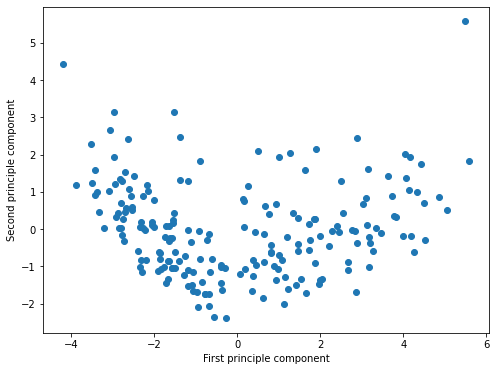

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('a2-dataset/unlabeled.csv')
df = pd.DataFrame(data, columns=['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r'])

# transform the data to comparable scales
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_result = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0],pca_result[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

pca.explained_variance_ratio_

The explained variance for the first principle component is 32.54%, and 9.21% for the second principle component.

**Part 2. K-Means and Silhouette Score**

Using the PCA-reduced data (i.e, now each point is represented by 2 numbers), perform K-Means clustering and calculate a silhouette score for various values of K. You may wish to plot the scores for easier visualization. What is the optimal silhouette score that you find, with which value of K? What does this signify?

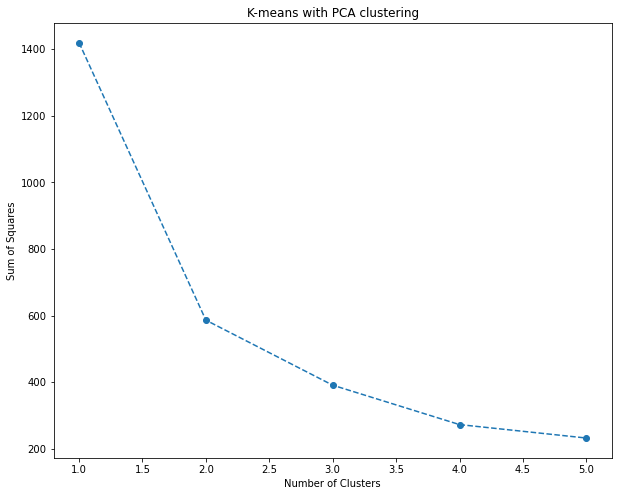

[0.5081353799885735,
 0.420382963873122,
 0.41706845025230244,
 0.4111936961971889]

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# elbow method
smsq = []
for i in range(1,6):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_result)
    smsq.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1,6), smsq, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares')
plt.title('K-means with PCA clustering')
plt.show()


# silhouette score
kmeans_per_k = []
silhouette_scores = []
for k in range(1,6):
    kmeans_per_k.append(KMeans(n_clusters=k, random_state=42).fit(pca_result))

for model in kmeans_per_k[1:]:
    silhouette_scores.append(silhouette_score(pca_result, model.labels_))
silhouette_scores

I decided to test 5 possible cluster values in order to find an optimal silhouette score. To determine the optimal number of clusters, I used the Elbow Method and confirmed my response using silhouette score method.

Thi signifies that the optimal number of clusters k for this data is 2.

https://www.youtube.com/watch?v=EItlUEPCIzM I used this video to understand the theory behind the Elbow Method and Silhouette score.

**Part 3. Cluster Interpretation** 

Use your chosen K from Part 2 and visualize the clusters as calculated using K-Means. In other words, each point should now be coloured based on the cluster it belongs to. Using the faces image folder provided, inspect the clusters and the corresponding images. What labels can you propose for the clusters? Note: There are 200 points in unlabeled.csv to analyze, but 300 images to avoid simply inspecting the dataset for an answer.

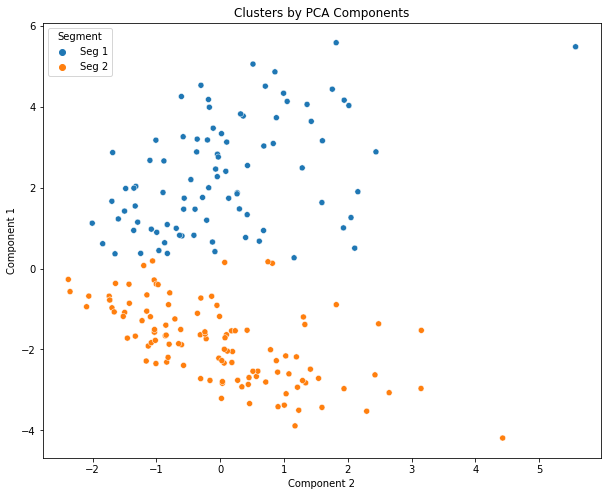

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Component 1,Component 2,Segment K-means PCA,Segment,filename
0,0.01,0.00,0.33,0.00,1.43,1.15,0.02,2.45,2.16,2.81,...,0.79,0.07,1.44,0.00,0.00,4.178694,-0.184732,0,Seg 1,Training_1214649.csv
1,0.39,0.00,0.00,0.00,0.84,0.00,0.00,0.87,2.64,1.64,...,0.77,0.00,1.60,0.00,0.21,2.674062,-1.101787,0,Seg 1,Training_582538.csv
2,2.37,2.09,0.00,2.16,0.00,0.00,0.00,0.00,0.00,0.00,...,1.06,0.00,0.00,0.00,0.00,-2.805249,0.713341,1,Seg 2,Training_1269926.csv
3,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.96,2.95,1.54,...,0.05,0.00,2.27,0.00,0.00,2.867657,-1.685623,0,Seg 1,Training_1433924.csv
4,1.12,0.00,2.07,0.00,2.24,0.87,1.26,1.26,2.02,1.85,...,0.75,0.00,1.41,0.23,0.00,4.162386,1.942700,0,Seg 1,Training_1151951.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.88,3.24,1.16,3.38,0.00,0.00,0.00,0.00,0.00,0.00,...,0.40,0.00,0.00,2.67,0.00,-4.189519,4.426001,1,Seg 2,Training_991508.csv
196,2.57,1.39,0.02,2.51,0.00,0.23,0.00,0.00,0.00,0.00,...,1.57,0.00,0.48,1.40,0.00,-2.627899,2.425213,1,Seg 2,Training_736311.csv
197,0.81,1.52,3.28,0.30,0.00,0.07,0.00,0.00,0.00,0.00,...,0.92,0.00,0.46,1.37,0.00,-1.366284,2.481921,1,Seg 2,Training_374584.csv
198,0.91,0.00,0.00,0.00,0.00,1.83,0.16,0.24,0.00,0.05,...,0.00,0.00,0.00,0.89,0.00,-0.729176,-0.303577,1,Seg 2,Training_2827611.csv


In [56]:
import seaborn as sns
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=12)
kmeans_pca.fit(pca_result)

df_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_result)], axis = 1)
df_pca_kmeans.columns.values[-2:] = ['Component 1', 'Component 2']

df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0:'Seg 1', 1:'Seg 2'})

x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

filenames = pd.DataFrame(data, columns=['filename'])
df_pca_kmeans = df_pca_kmeans.join(filenames)
df_pca_kmeans


The images in Segment 1 are characterized by open-teethed smiles and slightly narrowed eyes. The images in Segment 2 are characterized by a wide open mouth and widened eyes. Based on the corresponding images for the rows in the above table, I propose the labels "Happy" for Segment 1 and "Surprised" for Segment 2. 


Referenced code from: https://365datascience.com/tutorials/python-tutorials/pca-k-means/